## Ploteo de un archivo Netcdf4 :
### Reanalysis ERA-interim febrero del 1979
### https://apps.ecmwf.int/datasets/data/interim-full-daily/levtype=pl/

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime 
from datetime import timedelta

In [5]:
my_example="./reanalysis/_grib2netcdf-webmars-public-svc-blue-006-6fe5cac1a363ec1525f54343b6cc9fd8-jzsvLi.nc"
#my_example="hgt_pres_latlon_mean_20070324_20070331_belePYzXhf_500.nc"
fh = Dataset(my_example, mode='r')

In [12]:
print(fh.variables)


OrderedDict([('longitude', <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (33,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('latitude', <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (29,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('time', <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: time
current shape = (28,)
filling on, default _FillValue of -2147483647 used
), ('z', <class 'netCDF4._netCDF4.Variable'>
int16 z(time, latitude, longitude)
    scale_factor: 0.19589081073657547
    add_offset: 89137.87080459463
    _FillValue: -32767
    missing_value: -32767
    units: m**2 s**-2
    long_name: Geopotential
    standard_n

In [7]:
lat = fh.variables['latitude'][:]
lon = fh.variables['longitude'][:]
time = fh.variables['time'][:]
hgt = fh.variables['z'][:] # 2 meter temperature

hgt_units = fh.variables['z'].units


In [8]:
#FECHA####################################
fecha_init = datetime(1900,1,1,0,0,0)
print(fecha_init)

#https://stackoverflow.com/questions/9452775/converting-numpy-dtypes-to-native-python-types
hora=time[0].item() 
horas=timedelta(hours = hora)

fecha= fecha_init + horas
print(fecha)

fecha_str=datetime.strftime(fecha, '%Y%m%d_%H%MUTC')

print (fecha_str)

1900-01-01 00:00:00
1979-02-01 00:00:00
19790201_0000UTC


In [9]:
m = Basemap(projection='cyl', llcrnrlon=lon.min(), \
    urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
    resolution='c')

In [10]:
lon, lat = np.meshgrid(lon, lat)
xi, yi = m(lon, lat)

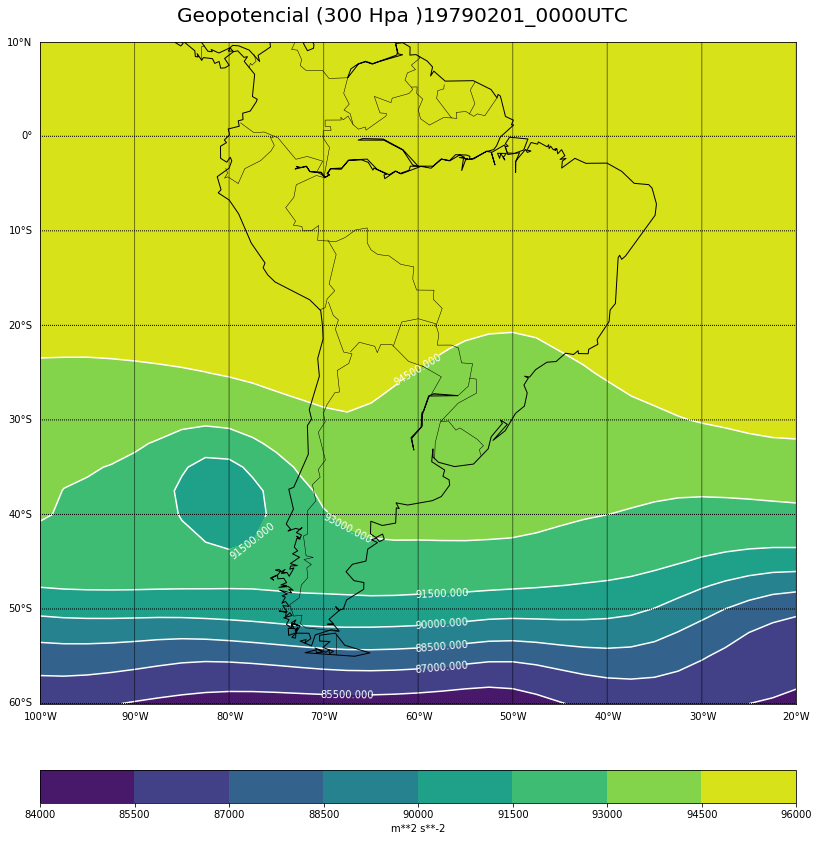

In [11]:
# Plot Data
plt.figure(figsize=(18,14))

cs = m.contour(xi,yi,np.squeeze(hgt[2]),colors="white")
plt.clabel(cs, inline=1, fontsize=10)
cs1 = m.contourf(xi,yi,np.squeeze(hgt[2]))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs1, location='bottom', pad="10%")
cbar.set_label(hgt_units)

# Add Title
#plt.title('Geopotencial (300 Hpa )'+ fecha_str)
plt.figtext(.5,.9,'Geopotencial (300 Hpa )'+ fecha_str, fontsize=20, ha='center')
plt.show()